# Download Fashion-MNIST

In [0]:
!mkdir -p ./data/fashion

In [2]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -O ./data/fashion/train-images-idx3-ubyte.gz

--2019-11-08 04:37:39--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.190
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘./data/fashion/train-images-idx3-ubyte.gz’

./data/fashion/trai 100%[===================>]  25.20M  6.49MB/s    in 3.9s    

2019-11-08 04:37:43 (6.49 MB/s) - ‘./data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]



In [3]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -O ./data/fashion/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -O ./data/fashion/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -O ./data/fashion/t10k-labels-idx1-ubyte.gz

--2019-11-08 04:38:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.138
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [binary/octet-stream]
Saving to: ‘./data/fashion/train-labels-idx1-ubyte.gz’

./data/fashion/trai 100%[===================>]  28.82K   111KB/s    in 0.3s    

2019-11-08 04:38:13 (111 KB/s) - ‘./data/fashion/train-labels-idx1-ubyte.gz’ saved [29515/29515]

--2019-11-08 04:38:15--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.138
Connecting to fashion-mnist.s3-websit

# Load Data

In [13]:
!mkdir ./utils
!wget https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py -O ./utils/mnist_reader.py

mkdir: cannot create directory ‘./utils’: File exists
--2019-11-08 04:40:13--  https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./utils/mnist_reader.py’

./utils/mnist_reade     [  <=>               ]  71.93K   195KB/s    in 0.4s    

2019-11-08 04:40:14 (195 KB/s) - ‘./utils/mnist_reader.py’ saved [73655]



In [14]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

SyntaxError: ignored

In [15]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

NameError: ignored

# Import Package

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *

Using TensorFlow backend.


In [0]:
from keras.callbacks import ReduceLROnPlateau

# Config

In [0]:
batch_size = 128
num_classes = 10
epochs = 40
w_l2 = 1e-5

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define swish function

In [0]:
def swish(x):
    return x * K.sigmoid(x)
    #return x * (1/(1 + K.exp(-x)))

# Experiment Swish

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2),))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_58 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_59 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 64)        0         
__________

In [0]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Experiment ReLU

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [0]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Experiment SELU

In [0]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale*K.tensorflow_backend.tf.where(x>0.0, x, alpha*K.tensorflow_backend.tf.exp(x)-alpha)

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(selu))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(selu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(selu))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
hist_selu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_history(hists, attribute='val_loss', axis=(-1,41,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn._ accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(10, 6))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Swish', 'ReLU', 'SELU'], loc=loc)  

    plt.show()

In [0]:
hists = [hist_swish, hist_relu, hist_selu]

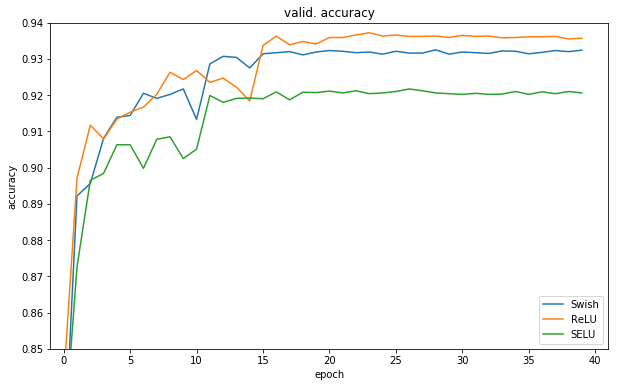

In [0]:
plot_history(hists, attribute='val_acc', loc='lower right')

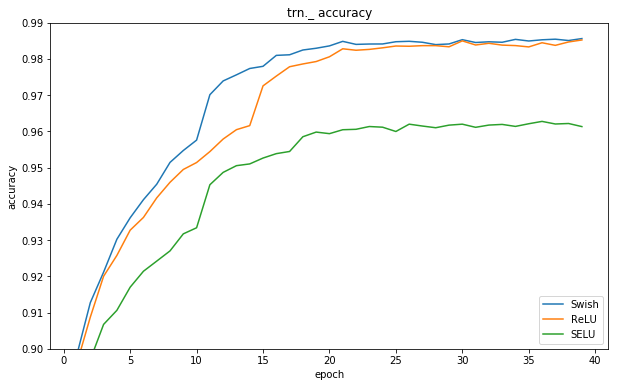

In [0]:
plot_history(hists, attribute='acc', axis=(-1,41,0.9,0.99), loc='lower right')

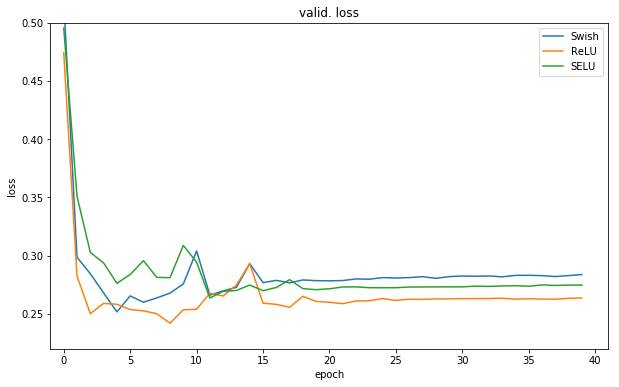

In [0]:
plot_history(hists, attribute='val_loss', axis=(-1,41,0.22,0.5), loc='upper right')

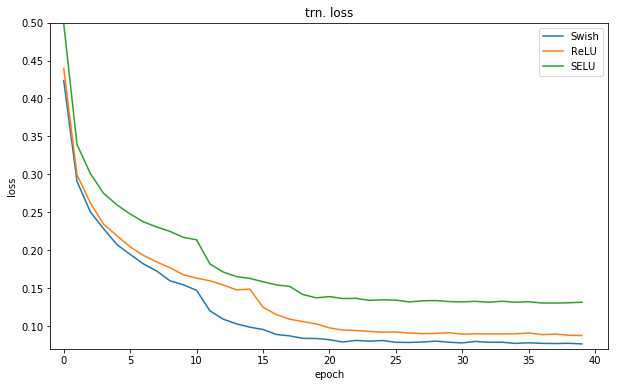

In [0]:
plot_history(hists, attribute='loss', axis=(-1,41,0.07,0.5), loc='upper right')